In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy

In [461]:
df = pd.read_csv('data_cleaned.csv')

In [462]:
df.head()

,Location,Beds,Price,Area,Type
0,Kuvempunagar,2,6400000,1010,House
1,Kuvempunagar,3,9200000,1505,House
2,Yadavagiri,3,11000000,1650,House
3,Somanatha Nagar,3,10500000,2000,House
4,Sardar Vallabh Bhai Patel Nagara,2,8800000,1200,House


In [463]:
np.mean(df['Price'])

10274230.8089701

In [464]:
df['Price_noramlized'] = [round(x/100000,2) for x in df['Price']]

In [465]:
df1 = df.copy()

In [466]:
df1[df1.Area/df.Beds < 300].head()

,Location,Beds,Price,Area,Type,Price_noramlized
9,Basavanahalli,3,6150000,643,Apartment,61.50
10,Yaraganahalli,3,7455955,796,Apartment,74.56
14,Sharadadevi Nagar,3,6400000,886,Apartment,64.00
29,Gaddige Road,3,15800000,691,Apartment,158.00
35,Metagalli,3,6235000,845,Apartment,62.35


In [467]:
df2 = df1[~(df1.Area/df.Beds < 300)]

In [468]:
df2.shape

(547, 6)

In [469]:
df2['PricePerSqft'] = df2['Price'] / df2['Area']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [470]:
df2['PricePerSqft'].describe()

count      547.000000
mean      6389.383770
std       3229.673975
min      -1081.080000
25%       4606.542882
50%       5750.000000
75%       7340.136054
max      45833.333333
Name: PricePerSqft, dtype: float64

In [471]:
def remove_pps_ourliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        avg = np.mean(subdf['PricePerSqft'])
        stdev = np.std(subdf['PricePerSqft'])
        reduced_df = subdf[(subdf['PricePerSqft'] > (avg-stdev)) & (subdf.PricePerSqft < (avg+stdev)) ]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [472]:
df3 = remove_pps_ourliers(df2)

In [473]:
df3.shape

(320, 7)

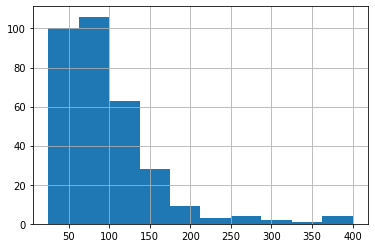

In [474]:
df3['Price_noramlized'].hist()

In [475]:
df3.describe()

,Beds,Price,Area,Price_noramlized,PricePerSqft
count,320.000000,3.200000e+02,320.000000,320.000000,320.000000
mean,2.815625,9.545695e+06,1625.890625,95.457031,6051.437902
std,1.190508,5.915030e+06,1001.895563,59.150292,1585.988451
min,1.000000,2.500000e+06,420.000000,25.000000,2400.000000
25%,2.000000,5.800000e+06,1100.000000,58.000000,4963.807353
50%,3.000000,7.500000e+06,1202.000000,75.000000,5818.181818
75%,3.000000,1.200000e+07,2000.000000,120.000000,6971.518987
max,10.000000,4.000000e+07,7200.000000,400.000000,11785.714286


In [476]:
df3.head()

,Location,Beds,Price,Area,Type,Price_noramlized,PricePerSqft
0,Alanahalli Village,1,4000000,600,House,40.0,6666.666667
1,Alanahalli Village,3,8000000,1400,House,80.0,5714.285714
2,Alanahalli Village,2,7400000,1250,House,74.0,5920.000000
3,BEML Nagar,3,12000000,2200,House,120.0,5454.545455
4,BEML Nagar,3,12800000,2200,House,128.0,5818.181818


In [477]:
data_1 = pd.read_csv('..\data_99acres\data_2_merge.csv')

In [478]:
data_1.head()

,Location,Beds,Price,Area,PricePerSqft
0,1st Stage Vijayanagar,2,120.0,1500.0,0.080000
1,1st Stage Vijayanagar,5,68.0,1900.0,0.035789
2,1st Stage Vijayanagar,5,250.0,2400.0,0.104167
3,1st Stage Vijayanagar,4,45.0,1200.0,0.037500
4,1st Stage Vijayanagar,4,25.0,600.0,0.041667


In [479]:
df3['Type'].unique()

array(['House', 'Apartment', 'Villa'], dtype=object)

In [480]:
data_2 = df3.drop(['Type'],1)

In [481]:
data_2.drop(['Price_noramlized'],1,inplace=True)

In [482]:
data_2.Price = round(data_2.Price/100000,2)

In [483]:
data_2.PricePerSqft = round(data_2.PricePerSqft/100000,2)

In [484]:
data_2.head()

,Location,Beds,Price,Area,PricePerSqft
0,Alanahalli Village,1,40.0,600,0.07
1,Alanahalli Village,3,80.0,1400,0.06
2,Alanahalli Village,2,74.0,1250,0.06
3,BEML Nagar,3,120.0,2200,0.05
4,BEML Nagar,3,128.0,2200,0.06


In [485]:
data = pd.concat([data_1,data_2])

In [486]:
data = data[~(data['Location'] == 'Sr')]

In [487]:
data.describe()

,Beds,Price,Area,PricePerSqft
count,593.000000,593.000000,593.000000,593.000000
mean,2.935919,99.160641,2323.586003,0.088376
std,1.279757,67.129650,10186.169945,0.505499
min,1.000000,15.000000,12.000000,0.000149
25%,2.000000,60.000000,1100.000000,0.049013
50%,3.000000,78.000000,1225.000000,0.060000
75%,3.000000,120.000000,2000.000000,0.079167
max,12.000000,700.000000,174240.000000,12.333333


In [488]:
data.nunique()

Location        106
Beds             10
Price           167
Area            203
PricePerSqft    229
dtype: int64

In [489]:
location_stats = data.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

In [490]:
location_stats[location_stats <= 2]

Location
Fort Mohalla                        2
Basavanahalli                       2
Yaraganahalli                       2
 Deepanagar                         2
Vishweshwara Nagar                  2
 BEML Nagar                         2
Srirangapatna                       2
Gokulam                             2
Gayathripuram                       2
Madagalli                           2
Mandi Mohalla                       2
Chamrajpura                         2
Bunnymantap                         2
N R Mohalla                         2
Elivala                             2
Police layout                       2
Rajarajeshwari Nagar                2
Chamarajapuram Mohalla              2
Sardar Vallabh Bhai Patel Nagara    2
Mysore                              1
Rajendra Nagar                      1
Siddharthanagar                     1
Hanchya                             1
Huyilalu                            1
 Kesare                             1
 KC Layout                          1
 Hu

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt

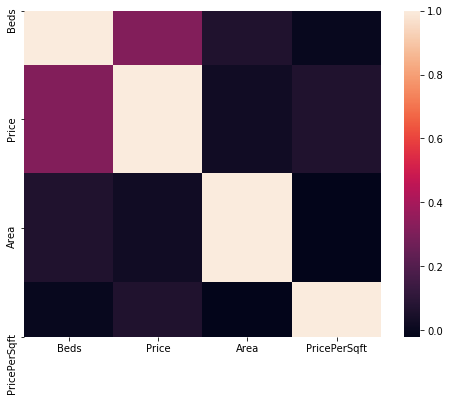

In [492]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())
plt.show()

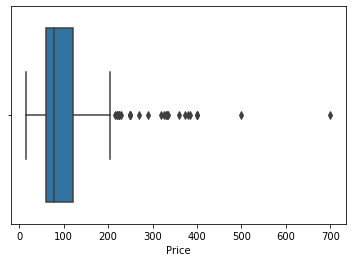

In [493]:
sns.boxplot(data['Price'],)

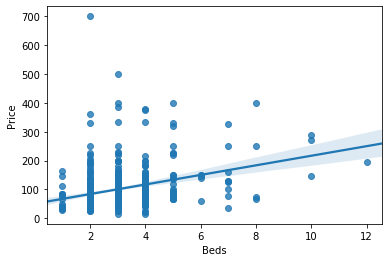

In [494]:
sns.regplot( data.Beds,data.Price ) 

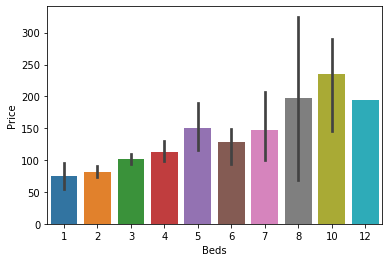

In [495]:
sns.barplot(x = data.Beds, y = data.Price)

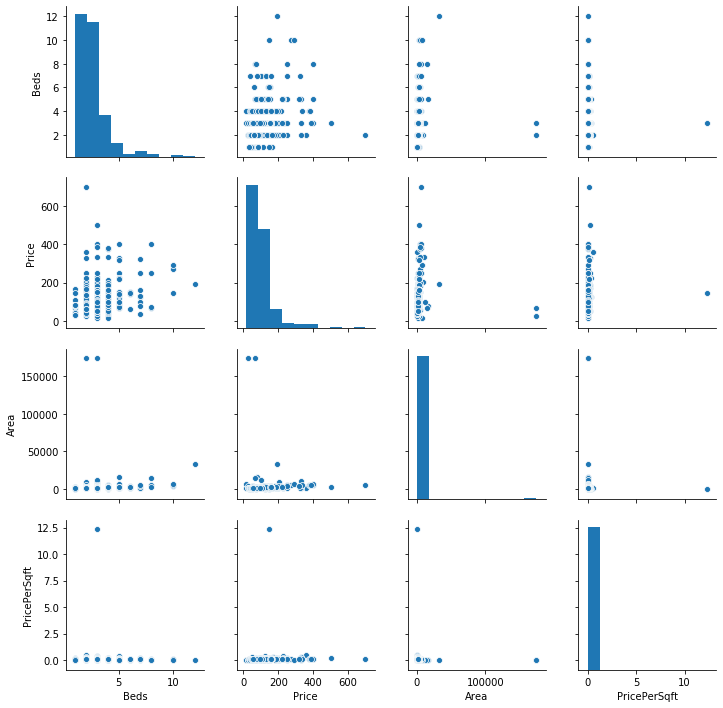

In [496]:
sns.pairplot(data)

In [510]:
#data_encode = pd.get_dummies(data)
data_encode = data

In [511]:
data_encode.head(3)

,Location,Beds,Price,Area,PricePerSqft
0,1st Stage Vijayanagar,2,120.0,1500.0,0.080000
1,1st Stage Vijayanagar,5,68.0,1900.0,0.035789
2,1st Stage Vijayanagar,5,250.0,2400.0,0.104167


In [512]:
data_encode.shape

(593, 5)

In [543]:
#X = data_encode.drop(['Price','Location'],axis = 'columns')
X = data_encode.drop(['Price'],axis = 'columns')

In [515]:
from sklearn import preprocessing
#X = preprocessing.scale(X)

In [516]:
y = data_encode.Price
y.head()

0    120.0
1     68.0
2    250.0
3     45.0
4     25.0
Name: Price, dtype: float64

In [517]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
onehot = enc.fit_transform(X)
X = onehot.toarray()


In [518]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=10)

In [519]:
from sklearn.linear_model import LinearRegression

lnr_clf = LinearRegression()
lnr_clf.fit(X_train,y_train)
lnr_clf.score(X_test,y_test)

-6.4960640089152785e+25

In [520]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([-2.54682948e+24, -3.11256214e+22, -2.45385862e+25, -2.10897710e+21,
       -2.07388793e+25])

In [524]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,-1.341818e+25,{'normalize': False}
1,lasso,8.884600e-02,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,5.274914e-03,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [527]:
config = {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
}

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=20)
gs =  GridSearchCV(DecisionTreeRegressor(),config['params'], cv=cv, return_train_score=False)
gs.fit(X,y)
print(gs.best_score_,gs.best_params_)

0.033450389404727554 {'criterion': 'mae', 'splitter': 'random'}


## Test the model for few properties

In [549]:
X_p = X.head(1)
X_pp = enc.fit_transform(X_p)
X_pp.toarray()

array([[1., 1., 1., 1.]])

In [550]:
gs.predict(X_pp.toarray())

ValueError: Number of features of the model must match the input. Model n_features is 548 and input n_features is 4 

In [446]:
predict_price(2,1600,400,2)

IndexError: index 0 is out of bounds for axis 0 with size 0

Index(['Beds', 'Area', 'PricePerSqft'], dtype='object')

In [553]:
data.to_csv('combined.csv',index=False)